<a href="https://colab.research.google.com/github/Premlatasharma221/ML_Project/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
#from keras.models import Sequential
from tensorflow.math import confusion_matrix


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy array
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

This is a gray scale image and the size of the image is 28*28

In [6]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

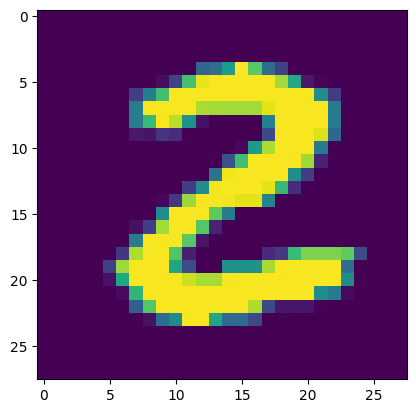

2


In [7]:
## displaying image
plt.imshow(x_train[25])
plt.show()

# print the corresponding label
print(y_train[25])

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
## unique values in y train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]


In [11]:
## scaling images
x_train = x_train/255
x_test = x_test/255

In [12]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
# setting up the layers of the Neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),

    keras.layers.Dense(10,activation = 'softmax')

])

In [14]:
# Complling the Neural Network

model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy"
,metrics = ['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2000 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0821 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0558 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

The training accuracy is 99 %
Now we will check the testing accuracy

In [16]:
loss , accuracy = model.evaluate(x_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1014 - accuracy: 0.9781
0.10139361023902893 0.9781000018119812


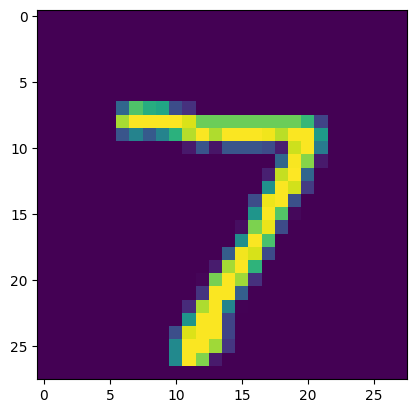

In [17]:
## first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [20]:
y_pred = model.predict(x_test)
print(y_pred)

313/313 [==============================] - 1s 2ms/step
[[2.11289861e-14 1.28219810e-10 3.55165869e-10 ... 1.00000000e+00
  2.89585305e-12 3.91759425e-09]
 [3.55618233e-16 1.14611446e-07 9.99999881e-01 ... 1.01230551e-14
  2.81208980e-11 3.69878609e-18]
 [6.96439434e-11 9.99987960e-01 5.31380273e-09 ... 5.68525820e-07
  1.12329890e-05 2.21958985e-08]
 ...
 [1.22024438e-22 1.28989277e-14 1.36999986e-17 ... 3.74857922e-11
  8.17468917e-17 1.38507712e-08]
 [1.89713879e-22 5.30253068e-19 8.64509523e-26 ... 5.09622898e-17
  4.63471492e-12 3.86101495e-21]
 [1.51408182e-17 2.65401522e-16 1.93600180e-16 ... 8.34785547e-24
  2.26782551e-14 2.69954115e-19]]


In [21]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0])

[2.1128986e-14 1.2821981e-10 3.5516587e-10 2.6597817e-09 4.0394273e-15
 1.2774056e-11 7.5606529e-21 1.0000000e+00 2.8958530e-12 3.9175942e-09]


In [24]:
# Converting the prediction probability to class label
label_for_first_test_img = np.argmax(y_pred[0])
print(label_for_first_test_img)

7


In [26]:
## coverting the prediction probability to class label for all the data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test =True labels
Y_pred_labels = predicted_labels

In [27]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 973    1    0    0    1    3    0    0    1    1]
 [   0 1123    2    4    0    1    2    1    2    0]
 [   1    2 1009    6    2    1    1    1    7    2]
 [   0    0    1  987    0    6    0    4    3    9]
 [   0    0    1    0  961    1    3    0    0   16]
 [   2    0    0   10    0  875    1    2    1    1]
 [   3    1    0    1    8    8  934    0    3    0]
 [   0    1    7    2    0    1    0 1000    2   15]
 [   6    0    2    8    4   11    0    3  930   10]
 [   1    2    1    2   10    1    0    1    2  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

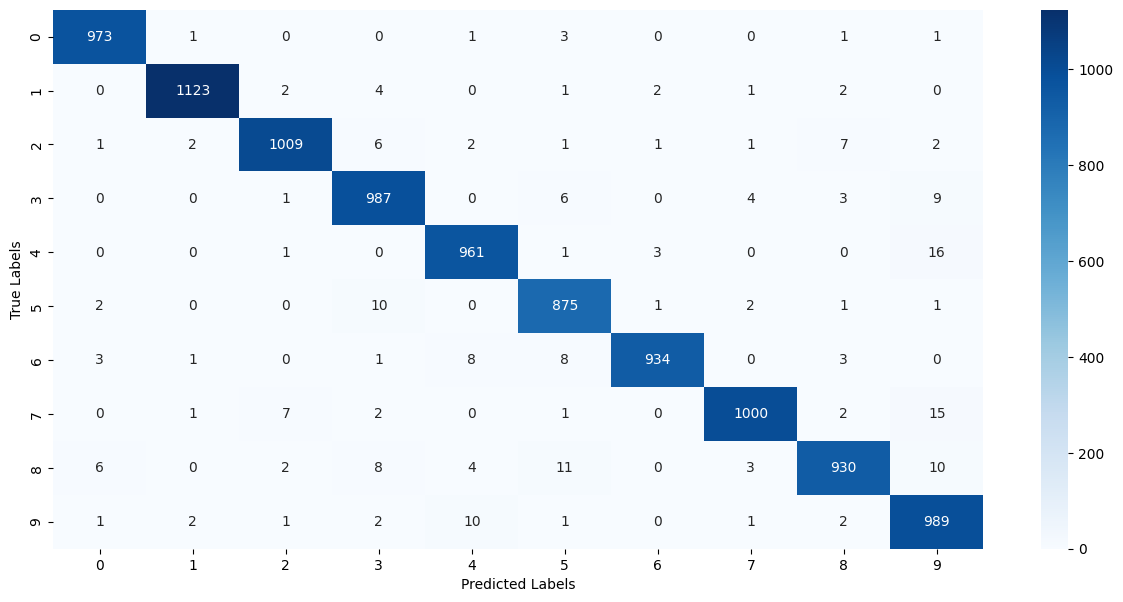

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True,fmt='d' ,cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [61]:
img = cv2.imread("test_img.jpg")


In [62]:
type(img)

numpy.ndarray

In [63]:
print(img)

[[[226 226 226]
  [226 226 226]
  [226 226 226]
  ...
  [227 227 227]
  [228 228 228]
  [221 221 221]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  3   3   3]
  [  3   3   3]
  [  2   2   2]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  2   2   2]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


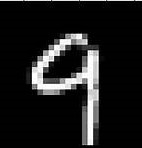

-1

In [65]:
cv2_imshow(img)
cv2.waitKey(0)

In [66]:
img.shape

(148, 142, 3)

In [69]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [70]:
gray_img.shape

(148, 142)

In [71]:
resize_img = cv2.resize(gray_img,(28,28))

In [72]:
resize_img.shape

(28, 28)

In [74]:
cv2_imshow(resize_img)

In [75]:
scale_input_img = resize_img/255

In [76]:
print(scale_input_img)

[[0.00392157 0.00392157 0.00392157 0.         0.03529412 0.02352941
  0.00392157 0.00392157 0.00784314 0.02352941 0.00784314 0.00392157
  0.         0.         0.         0.00784314 0.00392157 0.00392157
  0.00392157 0.00392157 0.00392157 0.01568627 0.00392157 0.00392157
  0.00392157 0.01960784 0.0627451  0.00784314]
 [0.00392157 0.00392157 0.00392157 0.00784314 0.00784314 0.00392157
  0.00392157 0.00392157 0.00392157 0.         0.00784314 0.
  0.         0.         0.         0.00392157 0.00784314 0.00392157
  0.00392157 0.00392157 0.02352941 0.01176471 0.00392157 0.00392157
  0.         0.00784314 0.00784314 0.00392157]
 [0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
  0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
  0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
  0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
  0.00392157 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 0.00392157 0.003

In [78]:
image_reshaped  = np.reshape(scale_input_img,(1,28,28))

In [79]:
type(image_reshaped)

numpy.ndarray

In [80]:
 input_pred = model.predict(image_reshaped)
 print(input_pred)

1/1 [==============================] - 0s 61ms/step
[[1.8364498e-14 1.3460700e-12 3.6782959e-12 8.0199493e-11 9.6861982e-08
  2.9699702e-12 1.9426104e-21 1.5098687e-09 6.2244126e-16 9.9999988e-01]]


In [81]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

9


**Predictive System**

Path of the image to be predicted : /content/seventh.jpg


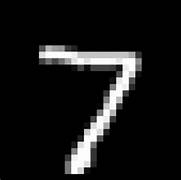

1/1 [==============================] - 0s 18ms/step
7


In [85]:
input_img_path = input("Path of the image to be predicted : ")
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)
grayscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

input_img_resize = cv2.resize(grayscale,(28,28))
input_img_Scaled = input_img_resize/255
img_reshaped = np.reshape(input_img_Scaled,(1,28,28))
img_prediction = model.predict(img_reshaped)
img_prediction_label = np.argmax(img_prediction)
print(img_prediction_label)